<a href="https://colab.research.google.com/github/yizhoucc/turtorials/blob/main/notebooks/RL_atari_games.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stable Baselines3 - Train on Atari Games

Github Repo: [https://github.com/DLR-RM/stable-baselines3](https://github.com/DLR-RM/stable-baselines3)


[RL Baselines3 Zoo](https://github.com/DLR-RM/rl-baselines3-zoo) is a training framework for Reinforcement Learning (RL), using Stable Baselines3.

It provides scripts for training, evaluating agents, tuning hyperparameters, plotting results and recording videos.

Documentation is available online: [https://stable-baselines3.readthedocs.io/](https://stable-baselines3.readthedocs.io/)

## Install Dependencies and Stable Baselines Using Pip


```
pip install stable-baselines3[extra]
```

In [1]:
!pip install "stable-baselines3[extra]>=2.0.0a4"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.7/434.7 kB 10.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached Farama_Notifications-0.0.4-py3-none-any.whl.metadata (558 bytes)
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.

## Import policy, RL agent, ...

In [2]:
from stable_baselines3 import A2C
from stable_baselines3.common.env_util import make_atari_env
from stable_baselines3.common.vec_env import VecFrameStack

## Training on Atari

there is a atari wrapper (it will downsample the image and convert it to gray scale).

we could wrap multiple env into 1 for faster training.

About Atari preprocessing: [Frame Skipping and Pre-Processing for Deep Q-Networks on Atari 2600 Games](https://danieltakeshi.github.io/2016/11/25/frame-skipping-and-preprocessing-for-deep-q-networks-on-atari-2600-games/)

![Pong](https://cdn-images-1.medium.com/max/800/1*UHYJE7lF8IDZS_U5SsAFUQ.gif)

In [3]:
# There already exists an environment generator that will make and wrap atari environments correctly.
env = make_atari_env("PongNoFrameskip-v4", n_envs=1, seed=0)


# we will not use wrapping here for better visualization
# Stack 4 frames
# env = VecFrameStack(env, n_stack=4)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
# training
model = A2C("CnnPolicy", env, verbose=1)
model.learn(total_timesteps=10_000)

Using cpu device
Wrapping the env in a VecTransposeImage.
------------------------------------
| time/                 |          |
|    fps                | 32       |
|    iterations         | 100      |
|    time_elapsed       | 15       |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -1.78    |
|    explained_variance | 0.00453  |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | -1.82    |
|    value_loss         | 0.944    |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 3.89e+03 |
|    ep_rew_mean        | -19      |
| time/                 |          |
|    fps                | 43       |
|    iterations         | 200      |
|    time_elapsed       | 23       |
|    total_timesteps    | 1000     |
| train/                |          |
|    entropy_loss       | -1.77    |
|    explained_va

KeyboardInterrupt: 

In [5]:
from google.colab import files
model.save("a2c_pong")
files.download("a2c_pong.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# files.upload()
# trained_model = A2C.load("a2c_pong", verbose=1)

In [6]:
trained_model=model

In [7]:
env = make_atari_env('PongNoFrameskip-v4', n_envs=1, seed=0)
# env = VecFrameStack(env, n_stack=4)
trained_model.set_env(env)

Wrapping the env in a VecTransposeImage.


In [ ]:
# continue training if needed
trained_model.learn(int(0.5e6))
model.save("a2c_pong2")
files.download("a2c_pong2.zip")

In [ ]:
# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg
# from IPython.display import display, clear_output
# done = False
# obs = env.reset()  # Initialize the environment and get the first observation


# for agent in env.agent_iter():
#     observation, reward, termination, truncation, info = env.last()

#     if termination or truncation:
#         action = None
#     else:
#         # this is where you would insert your policy
#         action = env.action_space(agent).sample()

#     env.step(action)

#     # Render the environment and capture the image
#     img = env.render(mode='rgb_array')  # Use 'rgb_array' to get the image
#     # Clear the previous output and display the new frame
#     clear_output(wait=True)
#     plt.imshow(img)
#     plt.axis('off')  # Hide axes
#     display(plt.gcf())

# env.close()

KeyboardInterrupt: 

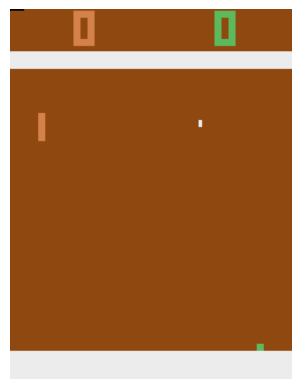

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import display, clear_output
done = False
obs = env.reset()  # Initialize the environment and get the first observation

while not done:
    action = model.predict(obs)[0]
    obs, rew, done, info = env.step(action)

    # Render the environment and capture the image
    img = env.render(mode='rgb_array')  # Use 'rgb_array' to get the image

    # Clear the previous output and display the new frame
    clear_output(wait=True)
    plt.imshow(img)
    plt.axis('off')  # Hide axes
    display(plt.gcf())